In [107]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [108]:
## Load libraries
import pandas as pd
import numpy as np

In [109]:
# Display options
pd.set_option('display.max_columns',50)

In [110]:
train_data = pd.read_csv('train_data_trial_2.csv')
test_data = pd.read_csv('test_data_trial_2.csv')

In [111]:
train_data.shape
train_data.head(2)

(948, 37)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,winner_01,team_count_4runs_last15,team_count_6runs_last15,avg_stkrate,avg_runs,avg_balls_faced,avg_caught,avg_bowled,avg_lbw,avg_run out,avg_stumped,runs_consistency,strike_rate_consistency,boundary_percentage
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,Hl Ph,12634,Hl Ph,field,Hr Ct Sm Ie,Indore,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,139.0,100.0,157.178571,1,1.555556,1.642857,0.904734,0.791258,1.424594,2.222222,1.666667,2.000,0.333333,0.666667,0.937386,0.890493,1.039725
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,Ed,20,Wt Is,field,Kn Ol Bn Bs,Bridgetown,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,156.0,50.0,103.500000,0,1.248227,0.593496,0.864729,0.924091,1.033629,0.890625,1.117647,1.125,1.333333,3.500000,0.985868,0.841438,0.968076


In [112]:
test_data.shape
test_data.head(2)

(271, 34)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team_count_4runs_last15,team_count_6runs_last15,avg_stkrate,avg_runs,avg_balls_faced,avg_caught,avg_bowled,avg_lbw,avg_run out,avg_stumped,runs_consistency,strike_rate_consistency,boundary_percentage
0,9250275,Jy,28594,7438955.0:8271969.0:8369661.0:3685247.0:259025...,Ud Ss of Aa,90,2436944.0:8117500.0:6703528.0:3010748.0:161387...,Ud Ss of Aa,field,Bo Ac Cb,Bulawayo,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,NaN,0.00,NaN,0.166667,0.142857,0.745558,0.505515,0.126984,0.285714,1.000000,0.500,1.000000,1.000000,0.170240,0.366911,1.031621
1,9262189,Ga An Ws,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188...,Ja Ts,36098,4690258.0:3761246.0:8464385.0:5742470.0:315072...,Ja Ts,field,Pe Sm Ga,Providence,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,151.285714,66.67,153.5,0.945355,0.937984,1.062096,0.993186,0.891282,0.896104,1.090909,0.625,0.727273,1.333333,0.984319,1.190884,1.015238


In [113]:
train_data['winner_01'] = train_data.apply(lambda x: 1 if (x['team2']==x['winner']) else 0, axis=1)

In [114]:
## Toss winner to numerical - 1 if team2 wins, else 0

train_data['toss_winner_01'] = np.where(train_data['toss winner']==train_data['team2'], 1, 0)
test_data['toss_winner_01'] = np.where(test_data['toss winner']==test_data['team2'], 1, 0)

In [115]:
## Toss decision - categorical - 1 if winner bats, 0 otherwise

train_data['toss_decision_01'] = np.where(train_data['toss decision']=='bat', 1, 0)
test_data['toss_decision_01'] = np.where(test_data['toss decision']=='bat', 1, 0)

In [11]:
X,y = train_data[['toss_winner_01','toss_decision_01','team_count_50runs_last15','team_winp_last5','team1only_avg_runs_last15','team1_winp_team2_last15','ground_avg_runs_last15','team_count_4runs_last15','team_count_6runs_last15','avg_stkrate','avg_runs','avg_balls_faced','avg_caught','avg_bowled','avg_lbw','avg_run out','avg_stumped','runs_consistency','strike_rate_consistency','boundary_percentage']], train_data['winner_01']

In [64]:
# X, y = train_data[['toss_winner_01', 'toss_decision_01', 'team_count_50runs_last15', 'team_winp_last5', 
#                    'team1only_avg_runs_last15', 'team1_winp_team2_last15', 'ground_avg_runs_last15', 
#                    'team_count_4runs_last15', 'team_count_6runs_last15', 'avg_stkrate', 'avg_runs', 
#                    'avg_balls_faced', 'avg_caught', 'avg_bowled', 'avg_lbw', 'avg_run out', 'avg_stumped', 
#                    'runs_consistency', 'strike_rate_consistency', 'boundary_percentage', 'avg_wicket_count', 
#                    'dot_ball_percentage_ratio', 'wicket_to_run_ratio', 'avg_bowling_strike_rate','avg_economy','avg_maiden','avg_dots',
#                   'avg_Fours','avg_Sixes','avg_wides','avg_noballs']], train_data['winner_01']

In [116]:
X, y = train_data[['toss_winner_01', 'toss_decision_01', 'team_count_50runs_last15', 'team_winp_last5', 
                   'team1only_avg_runs_last15', 'team1_winp_team2_last15', 'ground_avg_runs_last15', 
                   'team_count_4runs_last15', 'team_count_6runs_last15', 'avg_stkrate', 'avg_runs', 
                   'avg_balls_faced', 'avg_caught', 'avg_bowled', 'avg_lbw', 'avg_run out', 'avg_stumped', 
                   'runs_consistency', 'strike_rate_consistency', 'boundary_percentage']], train_data['winner_01']

In [117]:
X_test = test_data[X.columns.tolist()]

In [118]:
X_nans = X.isna().sum().reset_index()
X_nans[X_nans[0]!=0]

X_test_nans = X_test.isna().sum().reset_index()
X_test_nans[X_test_nans[0]!=0]

,index,0
4,team1only_avg_runs_last15,21
6,ground_avg_runs_last15,53
18,strike_rate_consistency,100


,index,0
4,team1only_avg_runs_last15,7
6,ground_avg_runs_last15,10
18,strike_rate_consistency,27


In [119]:
X.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

C:\Users\riori\anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [120]:
X_nans = X.isna().sum().reset_index()
X_nans[X_nans[0]!=0]

X_test_nans = X_test.isna().sum().reset_index()
X_test_nans[X_test_nans[0]!=0]

,index,0


,index,0


In [121]:
X['toss_winner_01'].value_counts()
X['toss_decision_01'].value_counts()
X['team_count_50runs_last15'].describe()

1    620
0    328
Name: toss_winner_01, dtype: int64

0    617
1    331
Name: toss_decision_01, dtype: int64

count    948.000000
mean       1.202602
std        1.008793
min        0.083333
25%        0.686678
50%        1.000000
75%        1.400000
max       11.000000
Name: team_count_50runs_last15, dtype: float64

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
# user-defined parameters

algo_name = 'GradientBoostingClassifier'
is_ensemble = 'no'
n_trees = 100
depth = 7
lr = 0.1

In [72]:
clf_gbm = GradientBoostingClassifier(n_estimators = n_trees, max_depth = depth, learning_rate = lr).fit(X,y)

In [73]:
train_data['y_pred_01'] = clf_gbm.predict(X)
test_data['y_pred_01'] = clf_gbm.predict(X_test)

In [74]:
from sklearn.metrics import classification_report

In [75]:
# Train accuracy
print(classification_report(y, clf_gbm.predict(X), labels=[0,1]))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67       468
           1       0.68      0.62      0.64       480

    accuracy                           0.66       948
   macro avg       0.66      0.66      0.66       948
weighted avg       0.66      0.66      0.66       948



In [76]:
train_data['win_pred_score'] = clf_gbm.predict_proba(X)[:,1]
test_data['win_pred_score'] = clf_gbm.predict_proba(X_test)[:,1]

In [77]:
train_data['win_pred_score'] = np.where( (train_data['y_pred_01']==0), (1-train_data['win_pred_score']), train_data['win_pred_score'])
test_data['win_pred_score'] = np.where( (test_data['y_pred_01']==0), (1-test_data['win_pred_score']), test_data['win_pred_score'])

In [78]:
train_data['win_pred_team_id'] = np.where( (train_data['y_pred_01']==0), (train_data['team1_id']), train_data['team2_id'])
test_data['win_pred_team_id'] = np.where( (test_data['y_pred_01']==0), (test_data['team1_id']), test_data['team2_id'])

In [79]:
df_feat_importance = pd.DataFrame({'feat_name':X.columns.tolist(), 'model_feat_imp_train':clf_gbm.feature_importances_}).sort_values(by='model_feat_imp_train', ascending=False)\
                                                                                                                        .reset_index(drop=True).head(30)
df_feat_importance

,feat_name,model_feat_imp_train
0,avg_Sixes,0.247685
1,team_count_6runs_last15,0.123422
2,avg_balls_faced,0.101511
3,avg_stkrate,0.089277
4,avg_wicket_count,0.076228
5,avg_dots,0.060963
6,avg_run out,0.060667
7,avg_economy,0.031679
8,avg_caught,0.028995
9,team_count_50runs_last15,0.028502


In [80]:
train_data['dataset_type'] = 'train'
test_data['dataset_type'] = 'r1'

In [81]:
## refactor

df_file1 = pd.concat([test_data[['match id','dataset_type','win_pred_team_id','win_pred_score',] + list(df_feat_importance['feat_name'].head(10))], \
                     train_data[['match id','dataset_type','win_pred_team_id','win_pred_score',] + list(df_feat_importance['feat_name'].head(10))]])

renaming_dict = {}
for i,col in enumerate(list(df_feat_importance['feat_name'].head(10))):
    renaming_dict[col] = f'indep_feat_id{i+1}'
df_file1.rename(columns=renaming_dict, inplace=True)

for i in range(1,11):
    if f'indep_feat_id{i}' not in df_file1.columns:
        df_file1[f'indep_feat_id{i}'] = np.nan

df_file1['train_algorithm'] = algo_name
df_file1['is_ensemble'] = is_ensemble
df_file1['train_hps_trees'] = n_trees
df_file1['train_hps_depth'] = depth
df_file1['train_hps_lr'] = lr

In [82]:
df_file1.shape
df_file1.head()

(1219, 19)

,match id,dataset_type,win_pred_team_id,win_pred_score,indep_feat_id1,indep_feat_id2,indep_feat_id3,indep_feat_id4,indep_feat_id5,indep_feat_id6,indep_feat_id7,indep_feat_id8,indep_feat_id9,indep_feat_id10,train_algorithm,is_ensemble,train_hps_trees,train_hps_depth,train_hps_lr
0,9250275,r1,90,0.696283,0.500000,0.142857,0.126984,0.745558,0.045455,0.106870,1.000000,0.104299,0.285714,0.000000,GradientBoostingClassifier,no,10,2,0.1
1,9262189,r1,36098,0.500481,1.108978,0.937984,0.891282,1.062096,0.828283,0.997905,0.727273,1.074122,0.896104,0.615385,GradientBoostingClassifier,no,10,2,0.1
2,9128776,r1,48334,0.500481,1.074441,1.116505,1.015487,0.957993,1.119266,1.015447,1.000000,1.051350,1.016393,0.842105,GradientBoostingClassifier,no,10,2,0.1
3,9586919,r1,36112,0.528026,0.987878,0.612069,0.819941,0.864815,1.367647,1.239170,0.666667,0.912698,0.948276,0.285714,GradientBoostingClassifier,no,10,2,0.1
4,9128538,r1,30414,0.544691,0.954269,1.986667,1.306907,1.061083,1.123711,0.895499,0.727273,1.062247,1.189655,2.375000,GradientBoostingClassifier,no,10,2,0.1


In [48]:
# feature_desc = {
#     'team_count_50runs_last15':'Ratio of number of 50s by players in team1 to number of 50s by players in team2 in last 15 games',
#     'team_winp_last5':'Ratio of team1\'s win % to team2\'s win % in last 5 games',
#     'ground_avg_runs_last15':'average runs scored in the ground in last 15 games',
#     'team1_winp_team2_last15':'Team1\'s win percentage against Team2 in last 15 games',
#     'team1only_avg_runs_last15':'team1\'s avg inning runs in last 15 games',
#     'season_num' : 'Numerical form of season. Takes 1 for oldest season and increases for latest seasons.',
#     'toss_winner_01' : 'Toss winner to numerical - 1 if team2 wins, else 0',
#     'toss_decision_01' : 'Toss decision - categorical - 1 if winner bats, 0 otherwise',
#     'team_count_4runs_last15': 'Ratio of total number of 4s by players in team1 to team2 in last 15 games',
#     'team_count_6runs_last15': 'Ratio of total number of 6s by players in team1 to team2 in last 15 games',
#     'avg_stkrate': 'Ratio of average team strike rate of all players in team1 to team2 in last 15 games',
#     'avg_runs': 'Ratio of average runs scored by all players in team1 to team2 in last 15 games',
#     'avg_balls_faced': 'Ratio of total number of balls faced by players in team1 to team2 in last 15 games',
#     'avg_caught': 'Ratio of total number of players that were caught in team1 to team2 in last 15 games',
#     'avg_bowled': 'Ratio of total number of players that were bowled in team1 to team2 in last 15 games',
#     'avg_lbw': 'Ratio of total number of players that were lbw in team1 to team2 in last 15 games',
#     'avg_run out': 'Ratio of total number of players that were run out in team1 to team2 in last 15 games',
#     'avg_stumped': 'Ratio of total number of players that were stumped in team1 to team2 in last 15 games',
#     'runs_consistency': 'Ratio of standard deviation of runs scored by players in team1 to team2 in last 15 games',
#     'strike_rate_consistency': 'Ratio of standard deviation of strike rates of players in team1 to team2 in last 15 games',
#     'boundary_percentage': 'Ratio of boundary percentage of players in team1 to team2 in last 15 games'
# }



In [83]:
feature_desc = {
    'team_count_50runs_last15': 'Ratio of number of 50s by players in team1 to number of 50s by players in team2 in last 15 games',
    'team_winp_last5': 'Ratio of team1\'s win % to team2\'s win % in last 5 games',
    'ground_avg_runs_last15': 'Average runs scored in the ground in last 15 games',
    'team1_winp_team2_last15': 'Team1\'s win percentage against Team2 in last 15 games',
    'team1only_avg_runs_last15': 'Team1\'s average inning runs in last 15 games',
    'season_num': 'Numerical form of season. Takes 1 for oldest season and increases for latest seasons.',
    'toss_winner_01': 'Toss winner to numerical - 1 if team2 wins, else 0',
    'toss_decision_01': 'Toss decision - categorical - 1 if winner bats, 0 otherwise',
    'team_count_4runs_last15': 'Ratio of total number of 4s by players in team1 to team2 in last 15 games',
    'team_count_6runs_last15': 'Ratio of total number of 6s by players in team1 to team2 in last 15 games',
    'avg_stkrate': 'Ratio of average team strike rate of all players in team1 to team2 in last 15 games',
    'avg_runs': 'Ratio of average runs scored by all players in team1 to team2 in last 15 games',
    'avg_balls_faced': 'Ratio of total number of balls faced by players in team1 to team2 in last 15 games',
    'avg_caught': 'Ratio of total number of players that were caught in team1 to team2 in last 15 games',
    'avg_bowled': 'Ratio of total number of players that were bowled in team1 to team2 in last 15 games',
    'avg_lbw': 'Ratio of total number of players that were lbw in team1 to team2 in last 15 games',
    'avg_run out': 'Ratio of total number of players that were run out in team1 to team2 in last 15 games',
    'avg_stumped': 'Ratio of total number of players that were stumped in team1 to team2 in last 15 games',
    'runs_consistency': 'Ratio of standard deviation of runs scored by players in team1 to team2 in last 15 games',
    'strike_rate_consistency': 'Ratio of standard deviation of strike rates of players in team1 to team2 in last 15 games',
    'boundary_percentage': 'Ratio of boundary percentage of players in team1 to team2 in last 15 games',
    'avg_wicket_count': 'Ratio of total wicket counts of team1 to team2 in last 15 games',
    'dot_ball_percentage_ratio': 'Ratio of dot ball percentage of team1 to team2 in last 15 games',
    'wicket_to_run_ratio': 'Ratio of wickets taken to runs conceded by team1 to team2 in last 15 games',
    'avg_bowling_strike_rate': 'Ratio of average bowling strike rate (balls bowled per wicket) of team1 to team2 in last 15 games',
    'avg_economy': 'Ratio of average economy rate of players in team1 to team2 in last 15 games',
    'avg_maiden': 'Ratio of average maiden overs of players in team1 to team2 in last 15 games',
    'avg_dots': 'Ratio of average dot balls of players in team1 to team2 in last 15 games',
    'avg_Fours': 'Ratio of average number of 4s conceded by players in team1 to team2 in last 15 games',
    'avg_Sixes': 'Ratio of average number of 6s conceded by players in team1 to team2 in last 15 games',
    'avg_wides': 'Ratio of average number of wides bowled by players in team1 to team2 in last 15 games',
    'avg_noballs': 'Ratio of average number of no-balls bowled by players in team1 to team2 in last 15 games'
}


In [84]:
# df_feat_importance.rename(index={0:'feat_id'}, inplace=True)
df_file2 = df_feat_importance
df_file2['feat_id'] = [i+1 for i in df_file2.index]
df_file2['feat_rank_train'] = [i+1 for i in df_file2.index]
df_file2 = df_file2.set_index('feat_id')
df_file2['feat_description'] = df_file2['feat_name'].map(feature_desc)

In [85]:
df_file2

,feat_name,model_feat_imp_train,feat_rank_train,feat_description
feat_id,,,,
1,avg_Sixes,0.247685,1,Ratio of average number of 6s conceded by play...
2,team_count_6runs_last15,0.123422,2,Ratio of total number of 6s by players in team...
3,avg_balls_faced,0.101511,3,Ratio of total number of balls faced by player...
4,avg_stkrate,0.089277,4,Ratio of average team strike rate of all playe...
5,avg_wicket_count,0.076228,5,Ratio of total wicket counts of team1 to team2...
6,avg_dots,0.060963,6,Ratio of average dot balls of players in team1...
7,avg_run out,0.060667,7,Ratio of total number of players that were run...
8,avg_economy,0.031679,8,Ratio of average economy rate of players in te...
9,avg_caught,0.028995,9,Ratio of total number of players that were cau...


In [35]:
df_file1.to_csv('file1.csv', index=False)
df_file2.to_csv('file2.csv')

In [123]:
import xgboost as xgb
from sklearn.metrics import classification_report

# user-defined parameters
algo_name = 'XGBoost'
is_ensemble = 'no'
n_trees = 100
depth = 2
lr = 0.1

# Preparing the model with user-defined parameters
clf_xgb = xgb.XGBClassifier(n_estimators=n_trees, max_depth=depth, learning_rate=lr,colsample_bytree=1,subsample=0.9, use_label_encoder=False, eval_metric='logloss').fit(X, y)

# Predicting on training data
train_data['y_pred_01'] = clf_xgb.predict(X)

# Predicting on test data
test_data['y_pred_01'] = clf_xgb.predict(X_test)

# Printing the classification report
print(classification_report(y, clf_xgb.predict(X), labels=[0, 1]))


              precision    recall  f1-score   support

           0       0.76      0.79      0.77       468
           1       0.79      0.75      0.77       480

    accuracy                           0.77       948
   macro avg       0.77      0.77      0.77       948
weighted avg       0.77      0.77      0.77       948



In [87]:
train_data['win_pred_score'] = clf_xgb.predict_proba(X)[:,1]
test_data['win_pred_score'] = clf_xgb.predict_proba(X_test)[:,1]

In [88]:
train_data['win_pred_score'] = np.where( (train_data['y_pred_01']==0), (1-train_data['win_pred_score']), train_data['win_pred_score'])
test_data['win_pred_score'] = np.where( (test_data['y_pred_01']==0), (1-test_data['win_pred_score']), test_data['win_pred_score'])

In [89]:
train_data['win_pred_team_id'] = np.where( (train_data['y_pred_01']==0), (train_data['team1_id']), train_data['team2_id'])
test_data['win_pred_team_id'] = np.where( (test_data['y_pred_01']==0), (test_data['team1_id']), test_data['team2_id'])

In [90]:
df_feat_importance = pd.DataFrame({'feat_name':X.columns.tolist(), 'model_feat_imp_train':clf_xgb.feature_importances_}).sort_values(by='model_feat_imp_train', ascending=False)\
                                                                                                                        .reset_index(drop=True).head(30)
df_feat_importance

,feat_name,model_feat_imp_train
0,avg_balls_faced,0.116853
1,team_count_6runs_last15,0.113322
2,avg_wicket_count,0.095924
3,avg_Sixes,0.082304
4,avg_economy,0.077483
5,avg_stkrate,0.077178
6,avg_dots,0.070658
7,avg_caught,0.065811
8,runs_consistency,0.064680
9,avg_run out,0.063123


In [91]:
train_data['dataset_type'] = 'train'
test_data['dataset_type'] = 'r1'

In [92]:
## refactor

df_file1 = pd.concat([test_data[['match id','dataset_type','win_pred_team_id','win_pred_score',] + list(df_feat_importance['feat_name'].head(10))], \
                     train_data[['match id','dataset_type','win_pred_team_id','win_pred_score',] + list(df_feat_importance['feat_name'].head(10))]])

renaming_dict = {}
for i,col in enumerate(list(df_feat_importance['feat_name'].head(10))):
    renaming_dict[col] = f'indep_feat_id{i+1}'
df_file1.rename(columns=renaming_dict, inplace=True)

for i in range(1,11):
    if f'indep_feat_id{i}' not in df_file1.columns:
        df_file1[f'indep_feat_id{i}'] = np.nan

df_file1['train_algorithm'] = algo_name
df_file1['is_ensemble'] = is_ensemble
df_file1['train_hps_trees'] = n_trees
df_file1['train_hps_depth'] = depth
df_file1['train_hps_lr'] = lr

In [93]:
df_file1.shape
df_file1.head()

(1219, 19)

,match id,dataset_type,win_pred_team_id,win_pred_score,indep_feat_id1,indep_feat_id2,indep_feat_id3,indep_feat_id4,indep_feat_id5,indep_feat_id6,indep_feat_id7,indep_feat_id8,indep_feat_id9,indep_feat_id10,train_algorithm,is_ensemble,train_hps_trees,train_hps_depth,train_hps_lr
0,9250275,r1,90,0.720394,0.126984,0.142857,0.045455,0.500000,0.104299,0.745558,0.106870,0.285714,0.170240,1.000000,XGBoost,no,10,2,0.1
1,9262189,r1,36084,0.513215,0.891282,0.937984,0.828283,1.108978,1.074122,1.062096,0.997905,0.896104,0.984319,0.727273,XGBoost,no,10,2,0.1
2,9128776,r1,30428,0.513215,1.015487,1.116505,1.119266,1.074441,1.051350,0.957993,1.015447,1.016393,0.991207,1.000000,XGBoost,no,10,2,0.1
3,9586919,r1,36112,0.518198,0.819941,0.612069,1.367647,0.987878,0.912698,0.864815,1.239170,0.948276,0.726958,0.666667,XGBoost,no,10,2,0.1
4,9128538,r1,30414,0.550914,1.306907,1.986667,1.123711,0.954269,1.062247,1.061083,0.895499,1.189655,1.240721,0.727273,XGBoost,no,10,2,0.1


In [94]:
# df_feat_importance.rename(index={0:'feat_id'}, inplace=True)
df_file2 = df_feat_importance
df_file2['feat_id'] = [i+1 for i in df_file2.index]
df_file2['feat_rank_train'] = [i+1 for i in df_file2.index]
df_file2 = df_file2.set_index('feat_id')
df_file2['feat_description'] = df_file2['feat_name'].map(feature_desc)

In [95]:
df_file2

,feat_name,model_feat_imp_train,feat_rank_train,feat_description
feat_id,,,,
1,avg_balls_faced,0.116853,1,Ratio of total number of balls faced by player...
2,team_count_6runs_last15,0.113322,2,Ratio of total number of 6s by players in team...
3,avg_wicket_count,0.095924,3,Ratio of total wicket counts of team1 to team2...
4,avg_Sixes,0.082304,4,Ratio of average number of 6s conceded by play...
5,avg_economy,0.077483,5,Ratio of average economy rate of players in te...
6,avg_stkrate,0.077178,6,Ratio of average team strike rate of all playe...
7,avg_dots,0.070658,7,Ratio of average dot balls of players in team1...
8,avg_caught,0.065811,8,Ratio of total number of players that were cau...
9,runs_consistency,0.064680,9,Ratio of standard deviation of runs scored by ...


In [96]:
df_file1.to_csv('file1_trial_2.csv', index=False)
df_file2.to_csv('file2_trial_2.csv')

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Load the train data file
train_data = pd.read_csv('train_data_trial_2.csv')

# # Define the feature columns based on the previous context
# feature_cols = ['team_count_50runs_last15', 'team_winp_last5', 
#                 'team1only_avg_runs_last15', 'team1_winp_team2_last15', 'ground_avg_runs_last15', 
#                 'team_count_4runs_last15', 'team_count_6runs_last15', 'avg_stkrate', 'avg_runs', 
#                 'avg_balls_faced', 'avg_caught', 'avg_bowled', 'avg_lbw', 'avg_run out', 'avg_stumped', 
#                 'runs_consistency', 'strike_rate_consistency', 'boundary_percentage', 'avg_wicket_count', 
#                 'dot_ball_percentage_ratio', 'wicket_to_run_ratio', 'avg_bowling_strike_rate', 'avg_economy', 
#                 'avg_maiden', 'avg_dots', 'avg_Fours', 'avg_Sixes', 'avg_wides', 'avg_noballs']

# Define the feature columns based on the previous context
feature_cols = ['team_count_50runs_last15', 'team_winp_last5', 
                'team1only_avg_runs_last15', 'team1_winp_team2_last15', 'ground_avg_runs_last15', 
                'team_count_4runs_last15', 'team_count_6runs_last15', 'avg_stkrate', 'avg_runs', 
                'avg_balls_faced', 'avg_caught', 'avg_bowled', 'avg_lbw', 'avg_run out', 'avg_stumped', 
                'runs_consistency', 'strike_rate_consistency', 'boundary_percentage']

# Prepare the feature matrix X and target vector y
X = train_data[feature_cols]
y = train_data['winner_01']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predict and calculate the accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Accuracy: 0.5736842105263158


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Initial Accuracy: 0.5210526315789473


<Figure size 720x576 with 0 Axes>

<BarContainer object of 29 artists>

Text(0.5, 0, 'Feature Importance')

Text(0, 0.5, 'Feature')

Text(0.5, 1.0, 'Feature Importance')

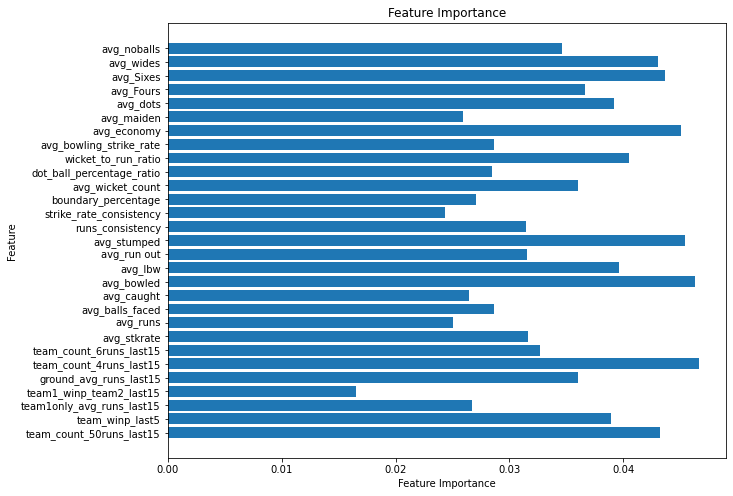

Least important features to consider dropping: ['team1_winp_team2_last15']


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Accuracy after dropping least important features: 0.5684210526315789


In [105]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the train data file
train_data = pd.read_csv('train_data_trial_3.csv')

# Define the feature columns based on the previous context
feature_cols = ['team_count_50runs_last15', 'team_winp_last5', 
                'team1only_avg_runs_last15', 'team1_winp_team2_last15', 'ground_avg_runs_last15', 
                'team_count_4runs_last15', 'team_count_6runs_last15', 'avg_stkrate', 'avg_runs', 
                'avg_balls_faced', 'avg_caught', 'avg_bowled', 'avg_lbw', 'avg_run out', 'avg_stumped', 
                'runs_consistency', 'strike_rate_consistency', 'boundary_percentage', 'avg_wicket_count', 
                'dot_ball_percentage_ratio', 'wicket_to_run_ratio', 'avg_bowling_strike_rate', 'avg_economy', 
                'avg_maiden', 'avg_dots', 'avg_Fours', 'avg_Sixes', 'avg_wides', 'avg_noballs']

# Prepare the feature matrix X and target vector y
X = train_data[feature_cols]
y = train_data['winner_01']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predict and calculate the accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Initial Accuracy: {accuracy}')

# Get feature importance scores
importance = model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(X.columns, importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Identify the least important features to drop
least_important_features = [feature for feature, importance in zip(X.columns, importance) if importance < 0.02]
print(f'Least important features to consider dropping: {least_important_features}')

# Drop the least important features and retrain the model
X_train_reduced = X_train.drop(columns=least_important_features)
X_test_reduced = X_test.drop(columns=least_important_features)

model_reduced = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_reduced.fit(X_train_reduced, y_train)

# Predict and calculate the accuracy after dropping features
y_pred_reduced = model_reduced.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)

print(f'Accuracy after dropping least important features: {accuracy_reduced}')


In [106]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load the train data file
train_data = pd.read_csv('train_data_trial_3.csv')

# Define the feature columns based on the previous context
feature_cols = [ 'team_count_50runs_last15', 'team_winp_last5', 
                'team1only_avg_runs_last15', 'team1_winp_team2_last15', 'ground_avg_runs_last15', 
                'team_count_4runs_last15', 'team_count_6runs_last15', 'avg_stkrate', 'avg_runs', 
                'avg_balls_faced', 'avg_caught', 'avg_bowled', 'avg_lbw', 'avg_run out', 'avg_stumped', 
                'runs_consistency', 'strike_rate_consistency', 'boundary_percentage']

# Prepare the feature matrix X and target vector y
X = train_data[feature_cols]
y = train_data['winner_01']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Define the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Accuracy: {best_score}')

# Train the model with the best parameters
best_model = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
best_model.fit(X_train, y_train)

# Predict and calculate the accuracy on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Test Accuracy: {accuracy}')


Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.9}
Best Cross-Validation Accuracy: 0.5396093439571701


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Test Accuracy: 0.6
